In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
import pickle as pkl

In [48]:
df=pd.read_csv("E:\DATA SETS\ANN\ANN_classification\data\Churn_Modelling.csv")

In [49]:
df.head()

,conRowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [50]:
df=df.drop(["Surname","conRowNumber","CustomerId"],axis=1)

In [51]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [52]:
#ONE HOT encoding

In [53]:
label_gender=LabelEncoder() 
df['Gender']=label_gender.fit_transform(df['Gender'])

In [54]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71,1
6,822,France,1,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,0,29,4,115046.74,4,1,0,119346.88,1
8,501,France,1,44,4,142051.07,2,0,1,74940.50,0
9,684,France,1,27,2,134603.88,1,1,1,71725.73,0


In [55]:
#oneHotencder in Geography

from sklearn.preprocessing import OneHotEncoder
OneHotEncoder_geo=OneHotEncoder(sparse=False)
geo_one=OneHotEncoder_geo.fit_transform(df[["Geography"]])

e:\projects\DecPro\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [56]:
OneHotEncoder_geo

OneHotEncoder(sparse=False, sparse_output=False)

In [57]:
geo_one

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [58]:
OneHotEncoder_geo.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [59]:
df_geo_encoder=pd.DataFrame(geo_one,columns=OneHotEncoder_geo.get_feature_names_out(['Geography']))

In [60]:
df_geo_encoder

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [61]:
#combine column
df_new=pd.concat([df.drop('Geography',axis=1),df_geo_encoder],axis=1 )

In [91]:
df_new.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [63]:
import pickle

In [64]:
#dumps the file

with open('LabelEncoder_gender.pkl','wb') as file:
    pickle.dump(label_gender,file)

with open('OneHotEncoder.pkl','wb') as file:
    pickle.dump(OneHotEncoder_geo,file)



In [65]:
X=df_new.drop(['Exited'],axis=1)
y=df_new['Exited']

In [66]:
#split the data 

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=51,test_size=0.30)

In [67]:
#scaling 
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [68]:
#checking the data is normaly distributed or not
df_new['Balance'].shape

(10000,)

In [69]:
import seaborn as sns

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

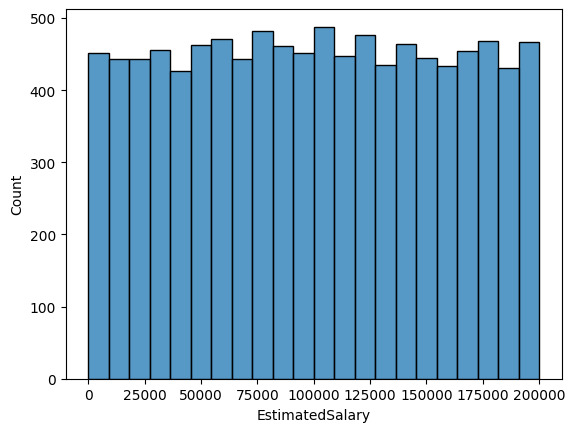

In [70]:
sns.histplot(df_new['EstimatedSalary'])

<Axes: xlabel='Balance', ylabel='Count'>

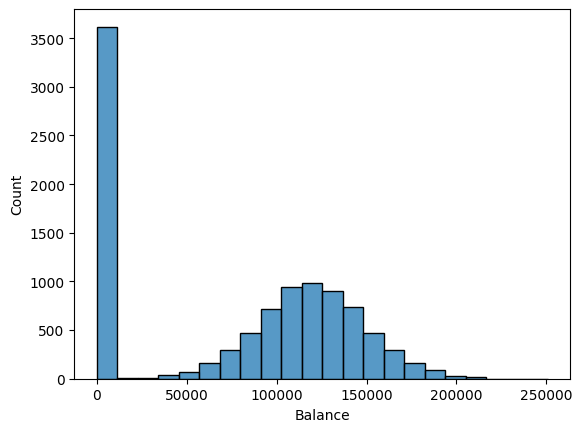

In [71]:
sns.histplot(df_new['Balance'])

<Axes: xlabel='CreditScore', ylabel='Count'>

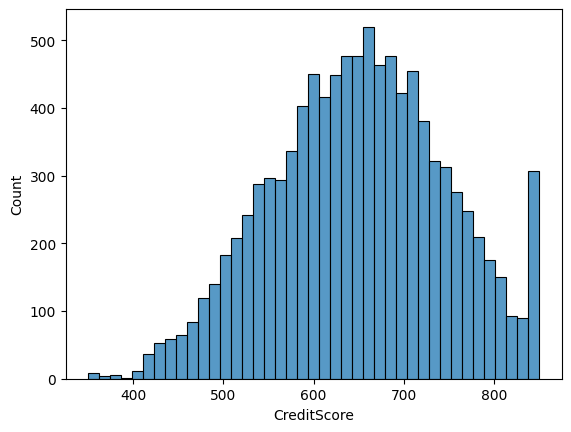

In [72]:
sns.histplot(df_new['CreditScore'])

In [73]:
scalers=StandardScaler()

In [74]:
#scaled
X_train=scalers.fit_transform(X_train)
X_test=scalers.transform(X_test)

In [75]:
X_train,X_test

(array([[ 1.32015173,  0.91555191, -0.17725192, ..., -1.01380963,
          1.7453489 , -0.57119169],
        [ 0.55851923, -1.09223736, -0.3690237 , ...,  0.98637848,
         -0.57295135, -0.57119169],
        [ 0.79524284, -1.09223736, -0.3690237 , ..., -1.01380963,
          1.7453489 , -0.57119169],
        ...,
        [-1.33526969,  0.91555191, -0.08136603, ...,  0.98637848,
         -0.57295135, -0.57119169],
        [ 0.81582751, -1.09223736, -0.3690237 , ...,  0.98637848,
         -0.57295135, -0.57119169],
        [-1.6337473 , -1.09223736, -0.75256727, ...,  0.98637848,
         -0.57295135, -0.57119169]]),
 array([[ 0.42471892, -1.09223736,  0.39806343, ..., -1.01380963,
          1.7453489 , -0.57119169],
        [ 0.14682598, -1.09223736,  1.16515056, ..., -1.01380963,
          1.7453489 , -0.57119169],
        [ 0.73348886,  0.91555191, -0.46490959, ...,  0.98637848,
         -0.57295135, -0.57119169],
        ...,
        [-1.22205405, -1.09223736,  0.11040575, ...,  

In [76]:
with open ("scaler.pkl","wb") as file:
    pickle.dump(scalers, file)

ANN IMPLEMENTATION

In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

In [78]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [79]:
model=Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)), #first Hidden layers
    Dense(32,activation='relu'), #second hidden layers
    Dense(1,activation='sigmoid')  #output layers

    
]

)

In [80]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                832       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
opt=tf.keras.optimizers.Adam(learning_rate=0.001)

In [82]:
import tensorflow
loss=tensorflow.keras.losses.BinaryCrossentropy()
loss

In [83]:
#compile the model in this step model will be trained 
model.compile(optimizer=opt,loss="binary_crossentropy",metrics=['accuracy'])

In [84]:
#setup the tensorboard
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

In [85]:
#during traning it collects logs
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callbacks=TensorBoard(log_dir=log_dir,histogram_freq=1)

In [86]:
#setup early stopping 
EarlyStopping_callbacks=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)


In [87]:
#train the model
histo=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,callbacks=[tensorflow_callbacks,EarlyStopping_callbacks])

Epoch 1/100
219/219 [==============================] - 3s 7ms/step - loss: 0.4525 - accuracy: 0.7973 - val_loss: 0.4204 - val_accuracy: 0.8200
Epoch 2/100
219/219 [==============================] - 1s 6ms/step - loss: 0.3879 - accuracy: 0.8404 - val_loss: 0.3798 - val_accuracy: 0.8377
Epoch 3/100
219/219 [==============================] - 1s 4ms/step - loss: 0.3555 - accuracy: 0.8559 - val_loss: 0.3625 - val_accuracy: 0.8457
Epoch 4/100
219/219 [==============================] - 1s 5ms/step - loss: 0.3429 - accuracy: 0.8623 - val_loss: 0.3683 - val_accuracy: 0.8453
Epoch 5/100
219/219 [==============================] - 1s 5ms/step - loss: 0.3374 - accuracy: 0.8639 - val_loss: 0.3582 - val_accuracy: 0.8507
Epoch 6/100
219/219 [==============================] - 1s 4ms/step - loss: 0.3337 - accuracy: 0.8651 - val_loss: 0.3552 - val_accuracy: 0.8473
Epoch 7/100
219/219 [==============================] - 1s 5ms/step - loss: 0.3286 - accuracy: 0.8677 - val_loss: 0.3580 - val_accuracy: 0.8467

In [88]:
model.save('model.h5')

e:\projects\DecPro\venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [89]:
#load tensorboard extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [90]:
%tensorboard --logdir logs/fit/

Reusing TensorBoard on port 6006 (pid 6108), started 1 day, 9:05:32 ago. (Use '!kill 6108' to kill it.)

Prediction with Trained ANN model